In [10]:
import os
from google.colab import files
uploaded = files.upload()




Saving Cats_vs_Dogs2.zip to Cats_vs_Dogs2 (1).zip


In [11]:
!unzip Cats_vs_Dogs2.zip

Archive:  Cats_vs_Dogs2.zip
   creating: Cats_vs_Dogs2/
   creating: Cats_vs_Dogs2/data/
   creating: Cats_vs_Dogs2/data/test/
   creating: Cats_vs_Dogs2/data/test/cats/
  inflating: Cats_vs_Dogs2/data/test/cats/cat.251.jpg  
  inflating: Cats_vs_Dogs2/data/test/cats/cat.252.jpg  
  inflating: Cats_vs_Dogs2/data/test/cats/cat.253.jpg  
  inflating: Cats_vs_Dogs2/data/test/cats/cat.254.jpg  
  inflating: Cats_vs_Dogs2/data/test/cats/cat.255.jpg  
  inflating: Cats_vs_Dogs2/data/test/cats/cat.256.jpg  
  inflating: Cats_vs_Dogs2/data/test/cats/cat.257.jpg  
  inflating: Cats_vs_Dogs2/data/test/cats/cat.258.jpg  
  inflating: Cats_vs_Dogs2/data/test/cats/cat.259.jpg  
  inflating: Cats_vs_Dogs2/data/test/cats/cat.260.jpg  
  inflating: Cats_vs_Dogs2/data/test/cats/cat.261.jpg  
  inflating: Cats_vs_Dogs2/data/test/cats/cat.262.jpg  
  inflating: Cats_vs_Dogs2/data/test/cats/cat.263.jpg  
  inflating: Cats_vs_Dogs2/data/test/cats/cat.264.jpg  
  inflating: Cats_vs_Dogs2/data/test/cats/cat.

In [14]:
train_dir = "/content/Cats_vs_Dogs2/data/train"
validation_dir = "/content/Cats_vs_Dogs2/data/test"

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

train_dir = "/content/Cats_vs_Dogs2/data/train"
validation_dir = "/content/Cats_vs_Dogs2/data/test"

train_image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.5
)

validation_image_gen = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

val_data_gen = validation_image_gen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 501 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


# Arcitecture

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# === 1. Архитектура модели ===
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

# model learning

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,  # остановит, если 3 эпохи без улучшения
    restore_best_weights=True
)

BATCH_SIZE = 16  # Лучше меньше для малых выборок
EPOCHS = 15

steps_per_epoch = train_data_gen.samples // BATCH_SIZE
validation_steps = val_data_gen.samples // BATCH_SIZE

print(f"Train steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")


history = model.fit(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

Train steps per epoch: 31
Validation steps: 3
Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6884 - loss: 0.6274 - val_accuracy: 0.7167 - val_loss: 0.5560
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6644 - loss: 0.6352 - val_accuracy: 0.7000 - val_loss: 0.5949
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6842 - loss: 0.5938 - val_accuracy: 0.7000 - val_loss: 0.5600
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6633 - loss: 0.5962 - val_accuracy: 0.7333 - val_loss: 0.5650


Visualization

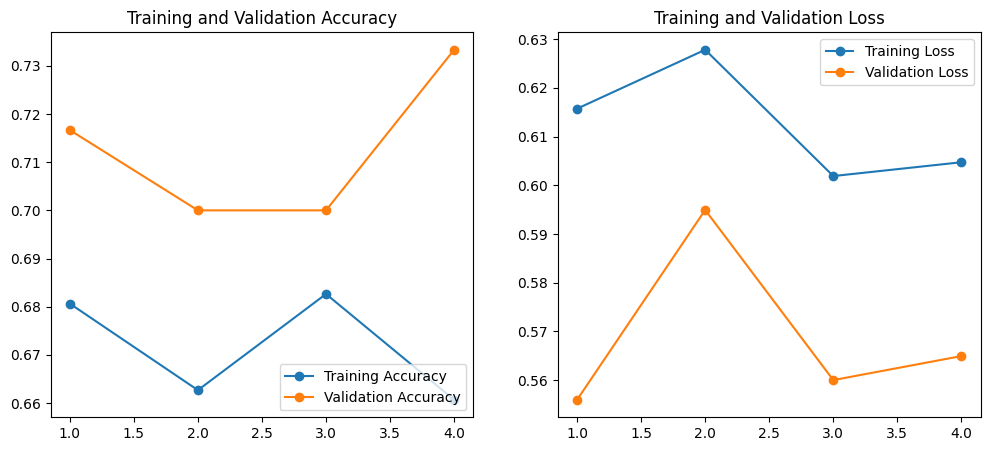

In [22]:
import matplotlib.pyplot as plt

# Извлекаем данные истории обучения
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

# Строим графики
plt.figure(figsize=(12, 5))

# === Accuracy ===
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# === Loss ===
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# SUM
Accuracy around 68–73% — not bad for such a small dataset (500 train + 60 val).

The val_loss is stabilizing — which means EarlyStopping is working 👍.

The gap between train and val is not huge → overfitting is moderate.

Overall, you can see how important the amount of data is in the classification process, but at the same time, the tools allow you to minimize losses.